# Analysis of the Geneva-Copenhagen Survey of The Solar Neighborhood
Be sure to first retrieve the GCS data as a .csv by running the notebook "gcs_retrieve".

In [2]:
# imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#read in data
data = pd.read_csv('../files/table1_gcs.csv')

/var/folders/_1/kjfmx9l970x8msh8rfwt4fzr0000gn/T/ipykernel_12077/3635357127.py:7: DtypeWarning: Columns (36,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../files/table1_gcs.csv')


## Clean Data

In [14]:
# build a new, clean, dataframe
clean_data = pd.DataFrame()

has_distance = (data['Dist'] != data['Dist'][0])
clean_data.loc[has_distance,'distance'] = data[has_distance]['Dist'].astype('int')

has_age = (data['Age'] != data['Age'][0])
clean_data.loc[has_age,'age'] = data[has_age]['Age'].astype('float')

has_vels = (data['UVel'] != data['UVel'][0])
clean_data.loc[has_vels,'UVel'] = data[has_vels]['UVel'].astype('float')
clean_data.loc[has_vels,'VVel'] = data[has_vels]['VVel'].astype('float')
clean_data.loc[has_vels,'WVel'] = data[has_vels]['WVel'].astype('float')

clean_data

,distance,age,UVel,VVel,WVel
2,42,7.6,40.0,-22.0,-16.0
3,70,9.3,-31.0,7.0,15.0
4,87,2.0,19.0,1.0,-24.0
6,91,4.7,11.0,-15.0,24.0
7,87,7.4,-48.0,-57.0,13.0
...,...,...,...,...,...
16672,38,NaN,-41.0,-14.0,-5.0
16673,52,NaN,-43.0,-22.0,2.0
16674,43,NaN,-45.0,-19.0,-3.0
16675,42,NaN,-42.0,-18.0,-2.0


In [17]:
#Get LSR vels

LSR = np.array([-10, -11, -7]) # Mamajek (2017)
# consensus LSR estimate from Bland-Hawthorn & Gerhard (2016)

clean_data.loc[has_vels,'rel_to_LSR'] = np.sqrt(((clean_data["UVel"] - LSR[0])**2\
                                                + (clean_data["VVel"]- LSR[1])**2 \
                                                + (clean_data["WVel"] - LSR[2])**2))

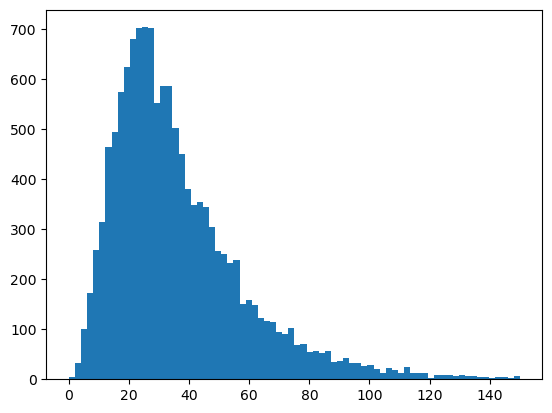

In [23]:
fig,ax = plt.subplots()
ax.hist(clean_data['rel_to_LSR'],np.linspace(0, 150, 75))
plt.show()

## Distance Histogram

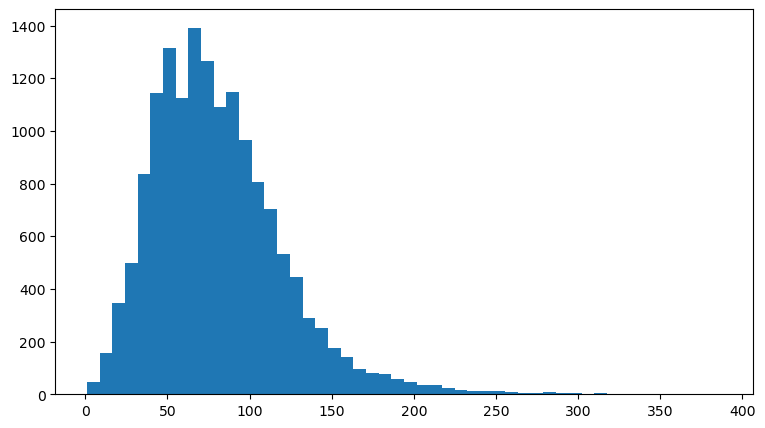

In [7]:
fig, ax = plt.subplots(figsize=(9,5))
ax.hist(clean_data['distance'], bins = 50)
plt.show()

## LSR vs Age Plot

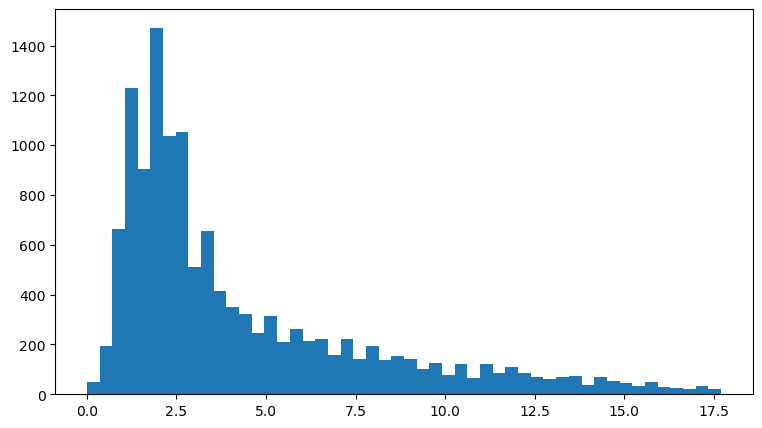

In [19]:
fig, ax = plt.subplots(figsize=(9,5))
ax.hist(clean_data['age'], bins = 50)
plt.show()